In [13]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import seaborn as sns

In [12]:
# return at each bucket, the difference between BS delta PnL and MV delta PnL
def moneynessVsTimeToMaturity(df):
    timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
    moneyness = ['<0.05','0.05-0.1','01-0.15','0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.35',
                            '0.35-0.4','0.4-0.45','0.45-0.5','0.5-0.55','0.55-0.6','0.6-0.65','0.65-0.7',
                            '0.7-0.75','0.75-0.8','0.8-0.85','0.85-0.9','0.9-0.95','>0.95']
    res = pd.DataFrame(index = moneyness, columns = timeToMaturity)
    for time in timeToMaturity:
        t = int(time)
        i = 0
        while i<1:
            df_tmp = df[(abs(df['days_to_expiry'] - t) <0.05)]
            df_tmp = df_tmp[df_tmp['delta']>i]
            df_tmp = df_tmp[df_tmp['delta']<=i+0.05]
            tmp = df_tmp['BS delta PnL'].sum()/len(df_tmp['BS delta PnL']) - df_tmp['MV delta PnL'].sum()/len(df_tmp['MV delta PnL'])
            res.iloc[int(round(i/0.05))][time] = tmp
            #print(f'generating {time}, and {i} and {int(round(i/0.05))} data: {tmp}')
            i = i+0.05
            
    return res

In [14]:
df = pd.read_csv('Hedging PnL result20220212 period 1.csv')
df = df.reset_index()
#df
res_period1 = moneynessVsTimeToMaturity(df)
res_period1

,8,9,10,13,14,15,16,17,20,21,22,23,24,27
<0.05,0,2.52202,1.07496,0.121739,-0.150137,1.23207,3.60806,0.975348,2.25848,1.40239,-5.78765,10.1343,-14.7941,15.9019
0.05-0.1,0,-1.01024,-1.30399,0.0661774,-0.0231985,0.503532,0.83761,0.249425,0.545508,0.328284,-0.67024,0.913317,-6.91153,25.6436
01-0.15,0,-8.87444,-11.2445,1.1898,-0.42026,3.58498,8.1318,1.89895,4.06735,3.17905,-8.60911,5.61484,0.694766,12.4285
0.15-0.2,0,-16.6642,-24.3721,2.21394,-0.848853,6.67839,15.8615,3.46007,7.37718,6.1519,-16.7707,9.39928,13.2595,22.2464
0.2-0.25,0,-24.0327,-36.5351,3.20273,-1.1552,10.0197,23.5473,5.08652,10.4431,9.45307,-23.7074,13.6352,22.2485,26.3141
0.25-0.3,0,-29.8007,-45.7467,4.2411,-1.51021,12.9205,30.0176,6.39767,14.1845,12.6556,-31.8478,18.7647,32.0172,24.7171
0.3-0.35,0,-38.8628,-55.7816,5.17241,-1.92872,16.3234,36.9458,7.86398,18.377,15.4995,-40.7587,23.0279,38.5841,29.2082
0.35-0.4,0,-47.4946,-66.033,5.94627,-2.16915,19.7224,44.0477,9.38334,21.7101,17.9062,-48.5557,27.4822,45.2434,25.2428
0.4-0.45,0,-52.0359,-77.2536,7.3068,-2.49468,21.8024,52.0026,11.0279,25.1732,21.3297,-54.9184,33.9699,50.8863,25.1855
0.45-0.5,0,-57.622,-94.9378,8.81387,-2.85043,24.5178,54.7879,12.6849,28.0604,23.5364,-61.4757,40.1789,58.7823,24.1179


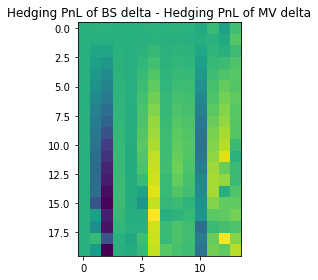

In [41]:
timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
moneyness = ['<0.05','0.05-0.1','01-0.15','0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.35',
                            '0.35-0.4','0.4-0.45','0.45-0.5','0.5-0.55','0.55-0.6','0.6-0.65','0.65-0.7',
                            '0.7-0.75','0.75-0.8','0.8-0.85','0.85-0.9','0.9-0.95','>0.95']
#res_period1 is ready
fig, ax = plt.subplots()
tmp = res_period1.astype(float, errors = 'raise')
tmp = tmp.to_numpy()
im = ax.imshow(tmp)

# Loop over data dimensions and create text annotations.
#for i in range(len(moneyness)):
#    for j in range(len(timeToMaturity)):
#        text = ax.text(j, i, tmp[i, j],
#                       ha="center", va="center", color="w")
        
ax.set_title("Hedging PnL of BS delta - Hedging PnL of MV delta")
fig.tight_layout()
plt.show()

In [42]:
df = pd.read_csv('Hedging PnL result20220213 period 3.csv')
df = df.reset_index()
#df
res_period3 = moneynessVsTimeToMaturity(df)
res_period3

,8,9,10,13,14,15,16,17,20,21,22,23,24,27
<0.05,0,2.52202,3.35994,1.58259,-0.150137,1.09944,4.4398,5.51603,8.21778,1.40239,-3.97069,6.72798,-9.89381,42.4193
0.05-0.1,0,-1.01024,2.1662,1.5012,-0.0231985,0.417221,2.69748,3.25041,4.8689,0.328284,-1.2666,-2.8263,-12.1875,86.8931
01-0.15,0,-8.87444,-10.2212,-6.08182,-0.42026,3.09992,13.9613,18.927,21.3177,3.17905,-7.17384,-6.36926,-13.7288,61.4818
0.15-0.2,0,-16.6642,-27.4159,-13.2404,-0.848853,5.82953,25.4563,33.0005,36.0919,6.1519,-13.1357,-8.73324,-6.74635,101.228
0.2-0.25,0,-24.0327,-43.7233,-20.7772,-1.1552,8.74318,36.8315,47.1072,49.5855,9.45307,-18.1325,-10.1942,-1.81892,122.872
0.25-0.3,0,-29.8007,-56.3074,-29.3036,-1.51021,11.298,46.2638,58.3081,65.6547,12.6556,-23.8294,-10.9325,4.58096,125.624
0.3-0.35,0,-38.8628,-70.2991,-34.7751,-1.92872,14.2745,56.0559,69.8851,81.4944,15.4995,-29.6971,-12.1645,9.24977,144.739
0.35-0.4,0,-47.4946,-84.8438,-41.6745,-2.16915,17.2277,65.5147,81.2203,94.4501,17.9062,-35.1924,-11.1508,18.7912,137.425
0.4-0.45,0,-52.0359,-101.286,-52.3129,-2.49468,19.1101,75.8605,90.6845,107.042,21.3297,-38.6329,-8.81959,37.6652,146.394
0.45-0.5,0,-57.622,-127.762,-61.904,-2.85043,21.467,75.654,91.3515,117.438,23.5364,-42.7348,-3.19899,46.4605,114.569


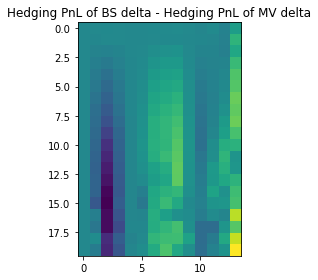

In [43]:
timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
moneyness = ['<0.05','0.05-0.1','01-0.15','0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.35',
                            '0.35-0.4','0.4-0.45','0.45-0.5','0.5-0.55','0.55-0.6','0.6-0.65','0.65-0.7',
                            '0.7-0.75','0.75-0.8','0.8-0.85','0.85-0.9','0.9-0.95','>0.95']
#res_period1 is ready
fig, ax = plt.subplots()
tmp = res_period3.astype(float, errors = 'raise')
tmp = tmp.to_numpy()
im = ax.imshow(tmp)

# Loop over data dimensions and create text annotations.
#for i in range(len(moneyness)):
#    for j in range(len(timeToMaturity)):
#        text = ax.text(j, i, tmp[i, j],
#                       ha="center", va="center", color="w")
        
ax.set_title("Hedging PnL of BS delta - Hedging PnL of MV delta")
fig.tight_layout()
plt.show()

In [44]:
df = pd.read_csv('Hedging PnL result20220213 period 5.csv')
df = df.reset_index()
#df
res_period5 = moneynessVsTimeToMaturity(df)
res_period5

,8,9,10,13,14,15,16,17,20,21,22,23,24,27
<0.05,0,2.52202,3.35994,3.19826,0.536978,1.63143,4.4398,5.41515,10.9503,8.95042,4.46161,6.72798,-8.60843,39.6405
0.05-0.1,0,-1.01024,2.1662,4.11213,2.08432,0.315554,2.69748,2.94691,13.6195,3.37669,-3.03844,-2.8263,-10.9392,80.1319
01-0.15,0,-8.87444,-10.2212,-10.8881,-6.98269,5.96205,13.9613,17.976,43.8021,19.2569,-1.27448,-6.36926,-8.07527,57.5939
0.15-0.2,0,-16.6642,-27.4159,-25.2599,-19.4081,11.6424,25.4563,31.4902,69.6891,36.9907,0.845097,-8.73324,2.70672,100.236
0.2-0.25,0,-24.0327,-43.7233,-40.4072,-29.1135,18.3514,36.8315,45.0583,92.6041,54.9385,3.99902,-10.1942,10.8367,128.571
0.25-0.3,0,-29.8007,-56.3074,-57.5758,-40.5929,24.0213,46.2638,55.8134,118.229,72.3158,7.49995,-10.9325,20.8664,150.001
0.3-0.35,0,-38.8628,-70.2991,-69.3266,-52.4445,30.9525,56.0559,67.0347,137.229,86.6985,12.8563,-12.1645,27.9907,173.196
0.35-0.4,0,-47.4946,-84.8438,-83.4475,-61.5839,37.7244,65.5147,78.1272,152.561,99.8723,16.5558,-11.1508,40.121,173.713
0.4-0.45,0,-52.0359,-101.286,-105.842,-72.1266,42.4542,75.8605,87.1372,162.885,117.217,23.1893,-8.81959,61.7629,186.676
0.45-0.5,0,-57.622,-127.762,-127.016,-83.6208,49.0997,75.654,87.6349,157.16,129.297,29.3375,-3.19899,72.1769,162.415


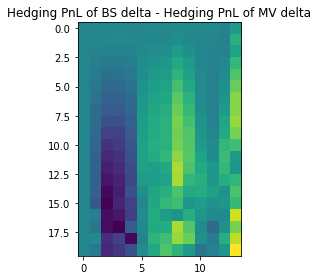

In [45]:
timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
moneyness = ['<0.05','0.05-0.1','01-0.15','0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.35',
                            '0.35-0.4','0.4-0.45','0.45-0.5','0.5-0.55','0.55-0.6','0.6-0.65','0.65-0.7',
                            '0.7-0.75','0.75-0.8','0.8-0.85','0.85-0.9','0.9-0.95','>0.95']
#res_period1 is ready
fig, ax = plt.subplots()
tmp = res_period5.astype(float, errors = 'raise')
tmp = tmp.to_numpy()
im = ax.imshow(tmp)

# Loop over data dimensions and create text annotations.
#for i in range(len(moneyness)):
#    for j in range(len(timeToMaturity)):
#        text = ax.text(j, i, tmp[i, j],
#                       ha="center", va="center", color="w")
        
ax.set_title("Hedging PnL of BS delta - Hedging PnL of MV delta")
fig.tight_layout()
plt.show()

In [46]:
df = pd.read_csv('Hedging PnL result20220214 period 7.csv')
df = df.reset_index()
#df
res_period7 = moneynessVsTimeToMaturity(df)
res_period7

,8,9,10,13,14,15,16,17,20,21,22,23,24,27
<0.05,0,2.52202,3.35994,3.19826,1.9678,3.53479,5.78156,5.68195,11.2019,12.7215,8.56983,14.4043,-2.35059,38.4559
0.05-0.1,0,-1.01024,2.1662,4.11213,6.56716,5.87239,-1.11586,4.41376,15.0861,16.179,0.0286646,-0.162719,-5.85815,74.8652
01-0.15,0,-8.87444,-10.2212,-10.8881,-5.4543,-4.25919,-4.59794,24.7102,47.0418,51.8705,13.6852,9.70854,14.1992,50.6246
0.15-0.2,0,-16.6642,-27.4159,-25.2599,-22.4519,-15.7735,-9.91831,43.1717,74.3272,88.9706,26.6122,19.3301,39.3186,92.4291
0.2-0.25,0,-24.0327,-43.7233,-40.4072,-36.3016,-31.664,-13.6843,61.7363,98.364,123.504,39.9484,28.9991,59.4689,121.568
0.25-0.3,0,-29.8007,-56.3074,-57.5758,-53.132,-46.2778,-18.2595,76.3101,124.767,151.972,54.4043,41.5321,82.6887,150.042
0.3-0.35,0,-38.8628,-70.2991,-69.3266,-71.2553,-62.1125,-20.3469,91.9275,142.936,165.365,72.2489,51.2005,100.063,171.374
0.35-0.4,0,-47.4946,-84.8438,-83.4475,-85.6166,-82.2049,-22.9812,106.951,157.297,176.397,81.639,63.9068,121.695,176.27
0.4-0.45,0,-52.0359,-101.286,-105.842,-101.927,-93.1407,-24.3032,118.596,164.156,187.675,94.6731,80.2052,153.997,184.859
0.45-0.5,0,-57.622,-127.762,-127.016,-122.484,-111.715,-32.5856,121.852,149.333,192.333,107.581,95.5415,170.662,170.326


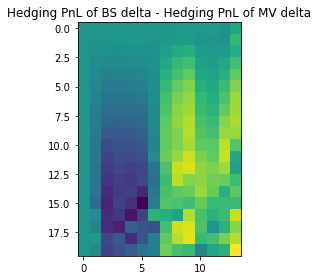

In [47]:
timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
moneyness = ['<0.05','0.05-0.1','01-0.15','0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.35',
                            '0.35-0.4','0.4-0.45','0.45-0.5','0.5-0.55','0.55-0.6','0.6-0.65','0.65-0.7',
                            '0.7-0.75','0.75-0.8','0.8-0.85','0.85-0.9','0.9-0.95','>0.95']
#res_period1 is ready
fig, ax = plt.subplots()
tmp = res_period7.astype(float, errors = 'raise')
tmp = tmp.to_numpy()
im = ax.imshow(tmp)

# Loop over data dimensions and create text annotations.
#for i in range(len(moneyness)):
#    for j in range(len(timeToMaturity)):
#        text = ax.text(j, i, tmp[i, j],
#                       ha="center", va="center", color="w")
        
ax.set_title("Hedging PnL of BS delta - Hedging PnL of MV delta")
fig.tight_layout()
plt.show()

In [11]:
i = 8
j = 0.5
tmp = df[(abs(df['days_to_expiry'] - i) <0.5)]
tmp = tmp[tmp['delta']>0.95]
tmp = tmp[tmp['delta']<=1]
#tmp

In [24]:
str_ = '8'
int_ = int(str_)
int_ *2.1

16.8